# Exercise 1
```In this exercise you will experience with pandas, matplotlib and numpy. This are main tools we are going to use later in course, and which are extremly useful in a variety of tasks. For each question, answer it in cells directly beneath it.```

```You are more than encourged to read relevant parts, mainly from ``` [pandas' API](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

```~ Ittai Haran```

## DataFrame basics

```A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames```

```import numpy and pandas```

In [0]:
import pandas as pd
import numpy as np

```Consider the following Python dictionary `data` and Python list `labels`:```

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

```Create a DataFrame `df` from this dictionary `data` which has the index `labels`.```

In [0]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, labels)

```Display a summary of the basic information about this DataFrame and its data using the decribe and the info functions```

In [3]:
df.describe()

,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
animal      10 non-null object
age         8 non-null float64
visits      10 non-null int64
priority    10 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


```Return the first 3 rows of the DataFrame `df`. Do it two times: use head and iloc```

In [5]:
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


In [6]:
df.iloc[:3]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


```Select just the 'animal' and 'age' columns from the DataFrame `df`.```

In [7]:
df.loc[:, ['animal', 'age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


```Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.```

In [8]:
# We'll take the rows [3, 4, 8] with iloc and then select specific columns by labels with loc
df.iloc[[3 ,4, 8]].loc[:, ['animal', 'age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


```Select only the rows where the number of visits is greater than 3. Pandas supports two useful APIs:
(df[boolean list/series]) returns the rows for which the value is True
(df[column] > num) returns a boolean series```

In [9]:
rows = df.loc[:, ['visits']] > 3
rows = list(rows.loc[:, 'visits'])
df.iloc[rows, :]

,animal,age,visits,priority


```Select the rows where the age is missing, i.e. is `NaN`.```

In [10]:
rows = np.isnan(df.loc[:, ['age']])
rows = list(rows.loc[:, 'age'])
df.iloc[rows, :]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


```Select the rows where the animal is a cat *and* the age is less than 3. You can use logical operands: &, |, ~```

In [11]:
cats = df.loc[:, ['animal']] == 'cat'
agethree = df.loc[:, ['age']] < 3
rows = np.array(cats.loc[:, 'animal']) & np.array(agethree.loc[:, 'age'])
df.iloc[rows, :]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


```Select the rows the age is between 2 and 4 (inclusive).```

In [12]:
young = df.loc[:, ['age']] <= 4
old = df.loc[:, ['age']] >= 2
rows = np.array(young.loc[:, 'age']) & np.array(old.loc[:, 'age'])
df.iloc[rows, :]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


```Change the age in row 'f' to 1.5.```

In [0]:
df.at['f', 'age'] = 1.5

```Calculate the sum of all visits (the total number of visits). Do it twice: using built in pandas functions and using numpy```

In [14]:
df.sum()['visits']

19

In [15]:
np.sum(df['visits'])

19

```Calculate the mean age for each different animal in `df`.```

In [16]:
df.groupby('animal').mean()

,age,visits
animal,,
cat,2.333333,2.0
dog,5.000000,2.0
snake,2.500000,1.5


In [17]:
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


```Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.```

In [18]:
new = pd.DataFrame({'animal': ['bambi'], 'age': [1.0], 'visits': [6], 'priority': ['yes']}, ['k'])
df = df.append(new)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [19]:
df = df.drop('k', axis = 0)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


```Count the number of each type of animal in `df`.```

In [20]:
df.groupby('animal').size()

animal
cat      4
dog      4
snake    2
dtype: int64

```Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order. You can use the sort_values function```

In [21]:
df.sort_values(by = ['age', 'visits'], ascending = [False, True])

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


```The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.```

In [22]:
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [23]:
s = df['priority'] == 'yes'
df['priority'] = df['priority'].where(s, False)
df['priority'] = df['priority'].where(s == False, True)
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,snake,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,cat,1.5,3,False
g,snake,4.5,1,False
h,cat,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


```In the 'animal' column, change the 'snake' entries to 'python'.```

In [24]:
s = df['animal'] != 'snake'
df['animal'] = df['animal'].where(s, 'python')
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,python,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,cat,1.5,3,False
g,python,4.5,1,False
h,cat,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


```For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).```

In [25]:
df.pivot_table(index = 'animal', columns = 'visits', values = 'age')

visits,1,2,3
animal,,,
cat,2.5,NaN,2.25
dog,3.0,6.0,NaN
python,4.5,0.5,NaN


```Now you will be asked to generate your own test data and manipulate it using functions you will have to create.```

```Create a dataframe with 1000 rows and 3 columns. The columns are to be the following:```
```
        - age: an integer, uniformly distributed between 20 to 65
        - skill: a float, normally distributed between 0 and 1, with expected value = 0.5 and standard deviation = 0.3
        - height: a float with 2 digits after the decimal point, between 1.5 to 2.0
```
```you might want to use numpy.random```

In [26]:
ages = []
skills = []
heights = []
mu = 0.5
sigma = 0.3

for i in range(1000):
    ages.append(20 + int(np.random.random()*45))
    
    skill = -1
    while(skill < 0 or skill > 1):
        skill = mu + sigma*np.random.randn()
    skills.append(skill)
    
    height = 1.5 + int(50*np.random.random())/100
    heights.append(height)
    
mydf = pd.DataFrame({'age': ages, 'skill': skills, 'height': heights})
mydf

,age,skill,height
0,39,0.387306,1.97
1,56,0.309833,1.75
2,31,0.568045,1.63
3,54,0.898502,1.61
4,57,0.820262,1.98
5,55,0.371646,1.50
6,22,0.593687,1.83
7,46,0.961843,1.96
8,22,0.554782,1.80
9,62,0.495854,1.69


```Add the dataframe a new columns, called salary, when:```
        <center>$salary = 1000\cdot((age^2)/1000 + 1.7\cdot skill + 0.4\cdot exp(-(height-1.7)^2)$<center>

In [27]:
salary = 1000*(mydf['age']**2 / 1000 + 1.7*mydf['skill'] + 0.4*np.exp(-(mydf['height']-1.7)**2))
mydf['salary'] = salary
mydf

,age,skill,height,salary
0,39,0.387306,1.97,2551.296978
1,56,0.309833,1.75,4061.717043
2,31,0.568045,1.63,2324.721834
3,54,0.898502,1.61,4840.226238
4,57,0.820262,1.98,5013.283029
5,55,0.371646,1.50,4041.113963
6,22,0.593687,1.83,1886.564786
7,46,0.961843,1.96,4124.987007
8,22,0.554782,1.80,1823.149638
9,62,0.495854,1.69,5086.911329


```Split the dataframe to groups by the age left digit and by the age. for each group compute:```
```
        - the number of rows
        - the mean salary
        - the maximum height     
```

```To do so, read about the groupby and agg functions is the ``` [pandas API](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [28]:
digit = (mydf['age'] - mydf['age']%10)/10
mydf['decade'] = digit

groups = mydf.groupby('decade')

mydf.pop('decade')

print("Number of Rows:\n", groups.size(), '\n\n')
print("Mean Salary", groups['salary'].agg(pd.DataFrame.mean), '\n\n')
print("Maximum Height", groups['height'].agg(pd.DataFrame.max))

Number of Rows:
 decade
2.0    198
3.0    219
4.0    251
5.0    227
6.0    105
dtype: int64 


Mean Salary decade
2.0    1862.755184
3.0    2457.488133
4.0    3229.782168
5.0    4280.251813
6.0    5095.965651
Name: salary, dtype: float64 


Maximum Height decade
2.0    1.99
3.0    1.99
4.0    1.99
5.0    1.99
6.0    1.99
Name: height, dtype: float64


```Now split the dataframe to groups by age. For each group compute the mean salary, divided by the sum of heights.```

In [29]:
groups = mydf.groupby('age')
meanSalary = groups['salary'].agg(pd.DataFrame.mean)
sumOfHeight = groups['height'].agg(pd.DataFrame.sum)
meanSalary / sumOfHeight

age
20     67.668014
21     45.609607
22     41.114555
23     66.580037
24     40.409459
25     68.601367
26     45.715162
27     60.711100
28     46.855750
29     72.998005
30     62.193759
31     45.202319
32     46.542990
33     63.544746
34     82.720181
35     93.848413
36     89.219009
37     71.325657
38     99.755007
39     45.780974
40     71.002483
41     62.448129
42     53.922789
43     56.001544
44     76.546722
45     83.579329
46    102.120613
47     86.329459
48     83.399961
49     81.479344
50     97.987879
51    138.275968
52    115.533932
53    128.476421
54     83.546612
55    108.381664
56     70.611656
57    117.894795
58    106.637983
59    162.327028
60    184.566873
61    112.938391
62    170.864748
63    109.558390
64    149.670906
dtype: float64

```Add these lines to your code:```
```python
        import matplotlib.pyplot as plt
        %matplotlib inline
``` 
       
```Now try using the pd.DataFrame.plot function to show your data. Try also using pd.DataFrame.boxplot.```

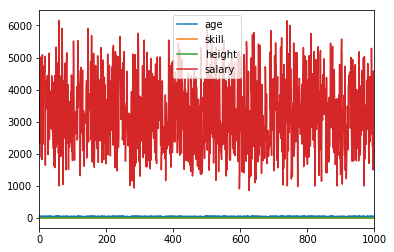

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

mydf.plot()

```Save the result as a csv```

In [0]:
mydf.to_csv("data.csv")

## Working with real-life data

```read the csv file entitled house_prices_numeric.csv consider writing the following line of code:```
```python
pd.options.display.max_columns=50
```

In [0]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns=50

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_numeric.csv')

```In the following questions, print your answer if possible, draw a graph or visualize it in any other means. When drawing a graph, add a title to it. Answer the following questions (try using a single line of code for each):```
```
- What is oldest house in the dataset (YearBuilt)?
- What is the highest price (SalePrice) of houses built in that year?
- What is the mean area (LotArea) of houses?
- What is the 50-percentile of the area (LotArea) of houses?
- What is more common: having a fireplace (Fireplaces) in the house, or not having one?
- What is the mean price (SalePrice) of houses that have swimming pools (PoolArea)?
- How many houses were sold every year (YrSold)? Draw a graph using plt.plot or pandas.plot
- What is the distribution of the overall condition of the houses (OverallCond)? Use plt.hist or pandas.hist
- For every number of fireplaces in a house (Fireplaces), compute the mean price of a house, the mean age of the house (we are in 2019) and the count of distinct FullBath values
- Take only houses with MSSubClass > 60. Split into groups according to whether or not the MSSubClass is a multiple of 20. For each group compute the mean, max, min and standard deviation of OverallQual
```

In [34]:
minIndex = df['YearBuilt'].idxmin()
print("Oldest Building Details:\n\n")
df.iloc[minIndex]

Oldest Building Details:




Id                 1350.0
MSSubClass           70.0
LotFrontage          50.0
LotArea            5250.0
OverallQual           8.0
OverallCond           5.0
YearBuilt          1872.0
YearRemodAdd       1987.0
MasVnrArea            0.0
BsmtFinSF1          259.0
BsmtFinSF2            0.0
BsmtUnfSF           425.0
TotalBsmtSF         684.0
1stFlrSF            938.0
2ndFlrSF           1215.0
LowQualFinSF        205.0
GrLivArea          2358.0
BsmtFullBath          0.0
BsmtHalfBath          0.0
FullBath              2.0
HalfBath              0.0
BedroomAbvGr          4.0
KitchenAbvGr          1.0
TotRmsAbvGrd          8.0
Fireplaces            0.0
GarageYrBlt           NaN
GarageCars            0.0
GarageArea            0.0
WoodDeckSF            0.0
OpenPorchSF          54.0
EnclosedPorch        20.0
3SsnPorch             0.0
ScreenPorch           0.0
PoolArea              0.0
MiscVal               0.0
MoSold               12.0
YrSold             2008.0
SalePrice        122000.0
Name: 1349, 

In [35]:
print("Highest price for houses built in 1872:\n")

lst = df.groupby('YearBuilt')['SalePrice'].max()
list(lst)[0]

Highest price for houses built in 1872:



122000

In [36]:
print("Mean area of houses:\n")
df['LotArea'].mean()

Mean area of houses:



10516.828082191782

In [37]:
print("50% precentile of houses area:\n")
df['LotArea'].median()

50% precentile of houses area:



9478.5

In [38]:
print("Abundance of fireplace in houses:\n")
df['Fireplaces'].median() == 1

Abundance of fireplace in houses:



True

In [39]:
print("Mean price of houses with pools:\n")
df[df['PoolArea'] > 0]['SalePrice'].mean()

Mean price of houses with pools:



288138.5714285714

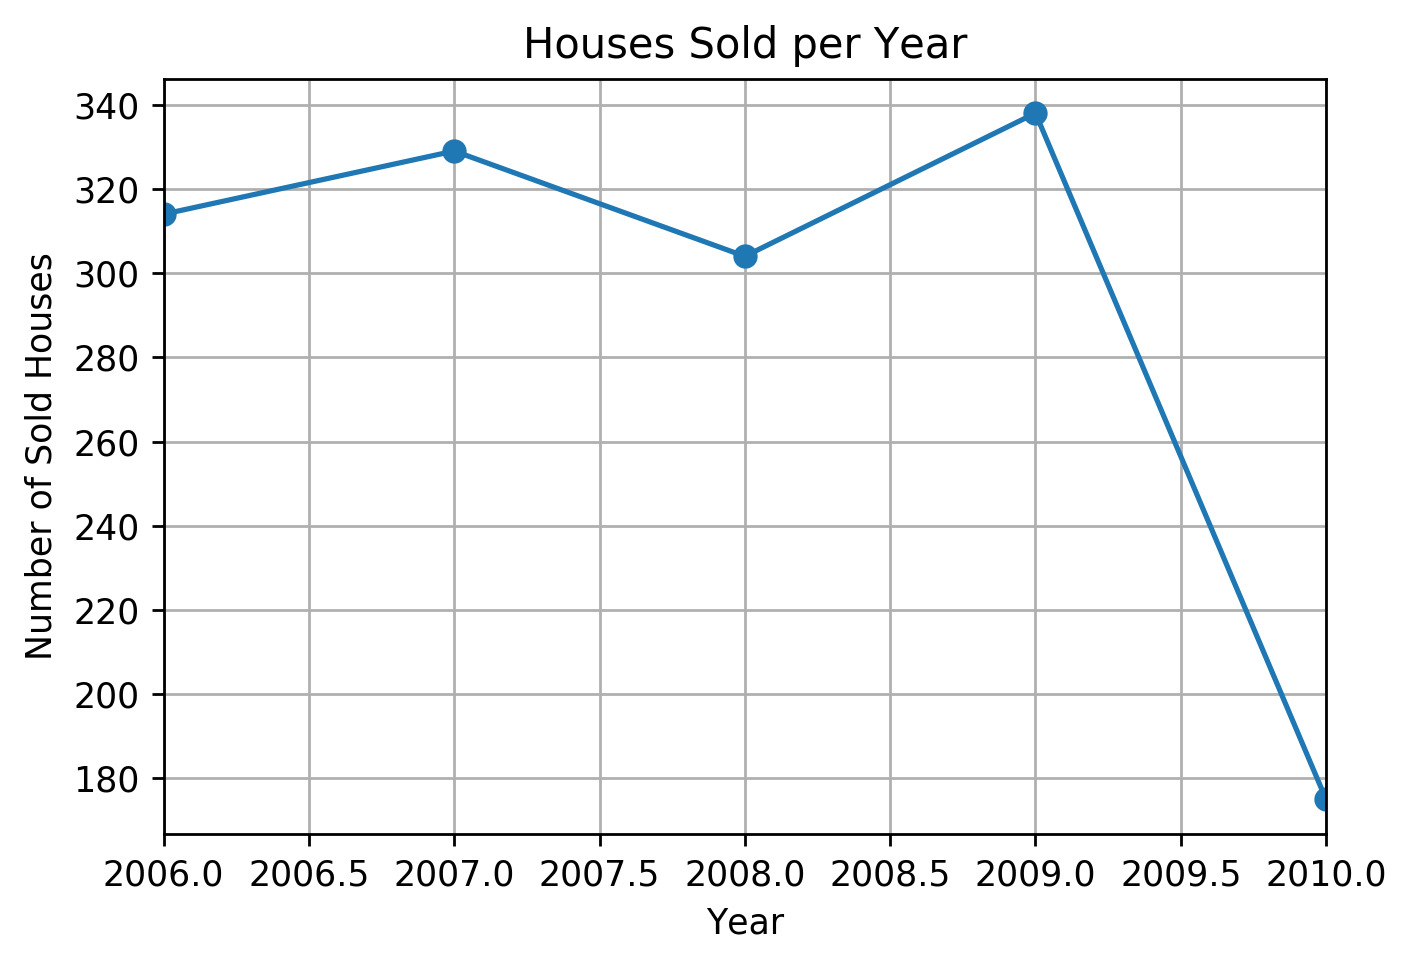

In [40]:
plt.figure(dpi = 250)
df.groupby('YrSold').size().plot(marker = 'o')
plt.title("Houses Sold per Year")
plt.xlabel("Year")
plt.ylabel("Number of Sold Houses")
plt.grid()

Text(0, 0.5, 'Number of Houses')

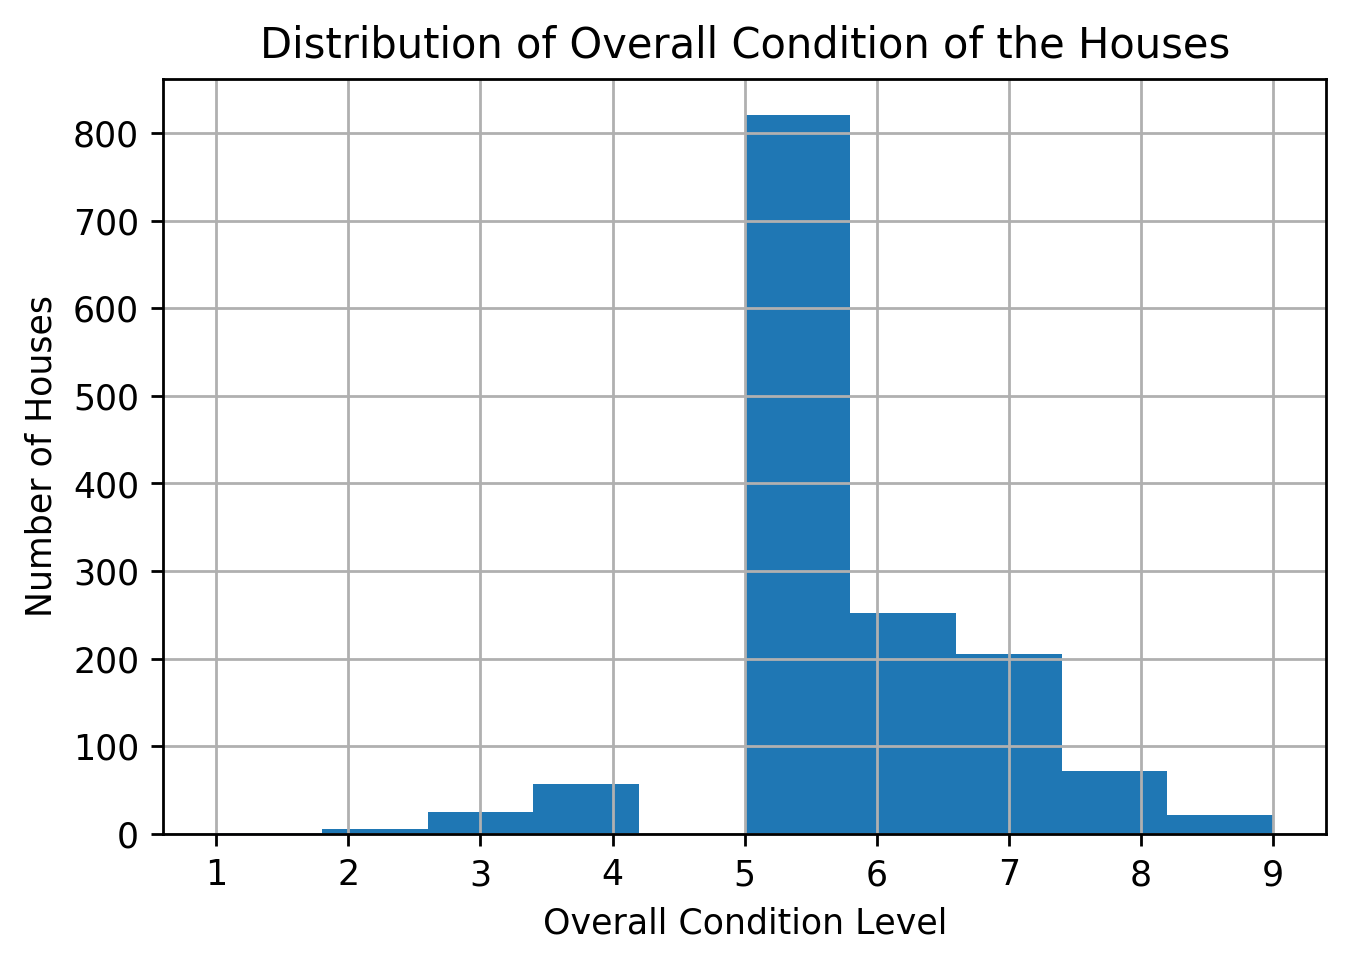

In [41]:
plt.figure(dpi = 250)
df['OverallCond'].hist()
plt.title("Distribution of Overall Condition of the Houses")
plt.xlabel("Overall Condition Level")
plt.ylabel("Number of Houses")

In [42]:
fireplaces = df.groupby('Fireplaces')
meanPrice = fireplaces['SalePrice'].mean()
age = 2019 - fireplaces['YearBuilt'].mean()
fullbath = fireplaces['FullBath'].nunique()

res = pd.DataFrame(meanPrice)
res['Mean Age'] = age
res['Count of Distinct Fullbath'] = fullbath
res

,SalePrice,Mean Age,Count of Distinct Fullbath
Fireplaces,,,
0,141331.482609,54.781159,4
1,211843.909231,39.150769,4
2,240588.539130,54.347826,4
3,252000.000000,38.400000,2


In [43]:
groups = df[df['MSSubClass'] > 60]['MSSubClass'] % 20 == 0
qual = subdf.groupby(groups)['OverallQual']

res = pd.DataFrame(qual.mean())
res['Max'] = qual.max()
res['Min'] = qual.min()
res['Standard Deviation'] = qual.std()
res

NameError: ignored

## Feature extraction

```Load the complete version of the houses table, entitled "house_prices_larger.csv"```

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_larger.csv')

```As you recall, the feature extraction process is done in order to let us describe the data in more "meaningful" manner. Add the following features to your dataframe:```
- ```LotArea in squared meters ( it's currently in units of squared feet)```
- ```1stFlrSF + 2ndFlrSF```
- ```GarageArea**0.5```
- ```LotArea / (BedroomAbvGr+1)```
- ```LotArea / (mean LotArea for houses built in that same year + 1e-5) - you might want to use``` [pandas merge function](https://www.google.com/search?q=pandas+merge&oq=pandas+merge&aqs=chrome..69i57l2j69i59l3j69i60.2080j0j9&sourceid=chrome&ie=UTF-8)
- ```Ranking of LotArea (largest house has 1, the second largest has 2 and so on)```
- ```One hot encoding of LotConfig - that is, add feature againts every value possible in LotConfig, which is 1 if the sample's LotConfig is this value and 0 otherwise (consider``` [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html))

```make a list of the names of the features you created.```

In [0]:
features = ['LotAreaMeter', 'FirstFloors', 'SqrtGarageArea', 'LotAreaRatioToBedroom', 'LotAreaRatioToOthers', 'LotAreaRanking', 'Corner', 'CulDSac', 'FR2', 'FR3', 'Inside']

df['LotAreaMeter'] = df['LotArea']*0.092903
df['FirstFloors'] = df['1stFlrSF'] + df['2ndFlrSF']
df['SqrtGarageArea'] = df['GarageArea']**0.5
df['LotAreaRatioToBedroom'] = df['LotArea'] / (df['BedroomAbvGr']+1)
ratio = pd.DataFrame(df.groupby('YearBuilt')['LotArea'].mean() + 1e-5)
df = df.merge(ratio, on = 'YearBuilt', suffixes = ('', 'RatioToOthers'))
df['LotAreaRanking'] = df['LotArea'].rank()
df = df.join(pd.get_dummies(df['LotConfig']))
df[features]

## Simple linear model

```Next, we will train a simple linear model, as seen in class, to predict SalePrice. Use the features you computed. Create train and test segments, normalize the data (both the features and the target) and use a linear model. Make sure you don't somehow use the test data when training your model (or when normalizing your data).```

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [0]:
train, test = train_test_split(df[features + ['SalePrice']])

Ytrain = train.pop('SalePrice')
Ytest = test.pop('SalePrice')

scaler = StandardScaler()
scaler.fit(df[features])

train = scaler.transform(X = train)
test = scaler.transform(X = test)

Ytrain /= Ytrain.max()
Ytest /= Ytest.max()

Im = LinearRegression()
Im.fit(train, Ytrain)
res = Im.predict(test)

plt.figure(dpi = 250)
plt.scatter(Ytest, res)
plt.title("Given Value vs. Calculated Value")
plt.xlabel("Given Value")
plt.ylabel("Model Calculated Value")
plt.plot([0.1, 0.9], [0.1,0.9], 'r--')
plt.grid()

print("Mean Squared Error Sum:", mean_squared_error(Ytest, res))

```Next, we will add extra features: for any feature you computed earlier, add feature**2 and feature**3. Now use Ridge regression (regularized linear regression, as we discussed in class). Draw graphs of the loss computed on the train and on the validation as a function of the regularization parameter, for``` 1$\leq\alpha\leq$30. ```What regularization would it be best to take?```

In [0]:
from sklearn.linear_model import Ridge

In [0]:
new_features = []

for feature in features:
    df[feature + '**2'] = df[feature]**2
    df[feature + '**3'] = df[feature]**3
    new_features += [feature + '**2', feature + '**3']

features += new_features    
df[features]

In [0]:
train, test = train_test_split(df[features + ['SalePrice']])

Ytrain = train.pop('SalePrice')
Ytest = test.pop('SalePrice')

alphas = list(range(1,31))
error_on_trained = []
error_on_test = []

for alpha in alphas:
    scaler = StandardScaler()
    scaler.fit(df[features])

    train = scaler.transform(X = train)
    test = scaler.transform(X = test)

    Ytrain /= Ytrain.max()
    Ytest /= Ytest.max()

    Im = Ridge(alpha)
    Im.fit(train, Ytrain)
    resTrain = Im.predict(train)
    resTest = Im.predict(test)
    error_on_trained.append(mean_squared_error(resTrain, Ytrain))
    error_on_test.append(mean_squared_error(resTest, Ytest))
    
plt.figure(dpi = 200)
plt.plot(alphas, error_on_trained, 'ro')
plt.plot(alphas, error_on_test, 'b*')
plt.title("Loss on Train Data (Red) and Test Data (Blue) as a function of alpha")
plt.xlabel("alpha")
plt.ylabel("Loss Value")

Therefore, we'd prefer to take a smaller $\alpha$ because the Loss is better for smaller $\alpha$'s, as we can see in the graph above.